# Multi-Layer Perceptron (Neural Network)

In [14]:
import numpy as np
import pandas as pd

In [15]:
data = pd.read_csv('processed_data.csv')

In [16]:
data.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4908.000000,4908.000000,4908.000000,4908.000000,4908.00000,4908.000000
mean,42.868810,0.091891,0.049511,105.297402,28.89456,0.042584
std,22.556128,0.288901,0.216954,44.425550,7.85432,0.201937
min,0.080000,0.000000,0.000000,55.120000,10.30000,0.000000
25%,25.000000,0.000000,0.000000,77.067500,23.50000,0.000000
50%,44.000000,0.000000,0.000000,91.680000,28.10000,0.000000
75%,60.000000,0.000000,0.000000,113.495000,33.10000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.60000,1.000000


In [17]:
data.head(5)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


## MLP without Over/Under Sampling

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.neural_network import MLPClassifier
from sklearn import metrics
import matplotlib.pyplot as plt

X = data.drop('stroke', axis=1)
y = data['stroke']

train_feature, test_feature, train_label, test_label = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

train_feature_dummy = pd.get_dummies(train_feature, drop_first=True)
test_feature_dummy = pd.get_dummies(test_feature, drop_first=True)

sss = StratifiedShuffleSplit(n_splits=4, test_size=0.20,random_state=0) 
sss.get_n_splits(train_feature_dummy, train_label)
print("##### TRAIN PHASE ####################################")
for i, (train_index, valid_index) in enumerate(sss.split(train_feature_dummy, train_label)):
    print("i :", "Train: ", train_index.shape, "--- Valid: ", valid_index.shape)
    X_train, X_valid = train_feature_dummy.iloc[train_index], train_feature_dummy.iloc[valid_index]
    y_train, y_valid = train_label.iloc[train_index], train_label.iloc[valid_index]
    model = MLPClassifier(hidden_layer_sizes=(15, 5), max_iter=1000)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_valid)
    accuracy = model.score(X_valid, y_valid)
    print('Accuracy:', accuracy)
    data_percentage = 1 - (data.stroke.sum()/len(data.stroke))
    print('Naive Model Accuracy:', data_percentage,)

    f1_score = metrics.f1_score(y_pred, y_valid)
    print("F1-score: ", f1_score)

    recall = metrics.recall_score(y_true=y_valid, y_pred=y_pred)
    print("recall: ", recall)

    print("---------------------------------------------")
print("##### TEST PHASE ####################################")
y_pred = model.predict(test_feature_dummy)
accuracy = model.score(test_feature_dummy, test_label)
print('Accuracy:', accuracy)
data_percentage = 1 - (data.stroke.sum()/len(data.stroke))
print('Naive Model Accuracy:', data_percentage,)

f1_score = metrics.f1_score(y_pred, test_label)
print("F1-score: ", f1_score)

recall = metrics.recall_score(y_true=test_label, y_pred=y_pred)
print("recall: ", recall)

##### TRAIN PHASE ####################################
i : Train:  (3140,) --- Valid:  (786,)
Accuracy: 0.9580152671755725
Naive Model Accuracy: 0.9574164629176855
F1-score:  0.0
recall:  0.0
---------------------------------------------
i : Train:  (3140,) --- Valid:  (786,)
Accuracy: 0.9580152671755725
Naive Model Accuracy: 0.9574164629176855
F1-score:  0.0
recall:  0.0
---------------------------------------------
i : Train:  (3140,) --- Valid:  (786,)
Accuracy: 0.9580152671755725
Naive Model Accuracy: 0.9574164629176855
F1-score:  0.0
recall:  0.0
---------------------------------------------
i : Train:  (3140,) --- Valid:  (786,)
Accuracy: 0.9580152671755725
Naive Model Accuracy: 0.9574164629176855
F1-score:  0.0
recall:  0.0
---------------------------------------------
##### TEST PHASE ####################################
Accuracy: 0.9572301425661914
Naive Model Accuracy: 0.9574164629176855
F1-score:  0.0
recall:  0.0


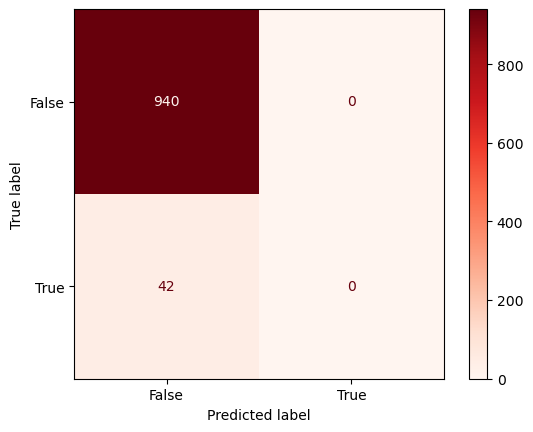

In [19]:
confusion_matrix = metrics.confusion_matrix(test_label, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot(cmap=plt.cm.Reds)
plt.show()

## MLP with Oversampling

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.neural_network import MLPClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler

X = data.drop('stroke', axis=1)
y = data['stroke']

oversampler = RandomOverSampler(random_state=42)

train_feature, test_feature, train_label, test_label = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

train_feature_dummy = pd.get_dummies(train_feature, drop_first=True)
test_feature_dummy = pd.get_dummies(test_feature, drop_first=True)

train_feature_dummy, train_label = oversampler.fit_resample(train_feature_dummy, train_label)

sss = StratifiedShuffleSplit(n_splits=4, test_size=0.20,random_state=0) 
sss.get_n_splits(train_feature_dummy, train_label)
print("##### TRAIN PHASE ####################################")
for i, (train_index, valid_index) in enumerate(sss.split(train_feature_dummy, train_label)):
    print("i :", "Train: ", train_index.shape, "--- Valid: ", valid_index.shape)
    X_train, X_valid = train_feature_dummy.iloc[train_index], train_feature_dummy.iloc[valid_index]
    y_train, y_valid = train_label.iloc[train_index], train_label.iloc[valid_index]
    model = MLPClassifier(hidden_layer_sizes=(15, 5), max_iter=1000)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_valid)
    accuracy = model.score(X_valid, y_valid)
    print('Accuracy:', accuracy)
    data_percentage = 1 - (data.stroke.sum()/len(data.stroke))
    print('Naive Model Accuracy:', data_percentage,)

    f1_score = metrics.f1_score(y_pred, y_valid)
    print("F1-score: ", f1_score)

    recall = metrics.recall_score(y_true=y_valid, y_pred=y_pred)
    print("recall: ", recall)

    print("---------------------------------------------")
print("##### TEST PHASE ####################################")
y_pred = model.predict(test_feature_dummy)
accuracy = model.score(test_feature_dummy, test_label)
print('Accuracy:', accuracy)
data_percentage = 1 - (data.stroke.sum()/len(data.stroke))
print('Naive Model Accuracy:', data_percentage,)

f1_score = metrics.f1_score(y_pred, test_label)
print("F1-score: ", f1_score)

recall = metrics.recall_score(y_true=test_label, y_pred=y_pred)
print("recall: ", recall)

##### TRAIN PHASE ####################################
i : Train:  (6014,) --- Valid:  (1504,)
Accuracy: 0.8311170212765957
Naive Model Accuracy: 0.9574164629176855
F1-score:  0.8382165605095542
recall:  0.875
---------------------------------------------
i : Train:  (6014,) --- Valid:  (1504,)
Accuracy: 0.8018617021276596
Naive Model Accuracy: 0.9574164629176855
F1-score:  0.815365551425031
recall:  0.875
---------------------------------------------
i : Train:  (6014,) --- Valid:  (1504,)
Accuracy: 0.7845744680851063
Naive Model Accuracy: 0.9574164629176855
F1-score:  0.7944162436548223
recall:  0.8324468085106383
---------------------------------------------
i : Train:  (6014,) --- Valid:  (1504,)
Accuracy: 0.7985372340425532
Naive Model Accuracy: 0.9574164629176855
F1-score:  0.8107432854465959
recall:  0.863031914893617
---------------------------------------------
##### TEST PHASE ####################################
Accuracy: 0.7372708757637475
Naive Model Accuracy: 0.9574164629

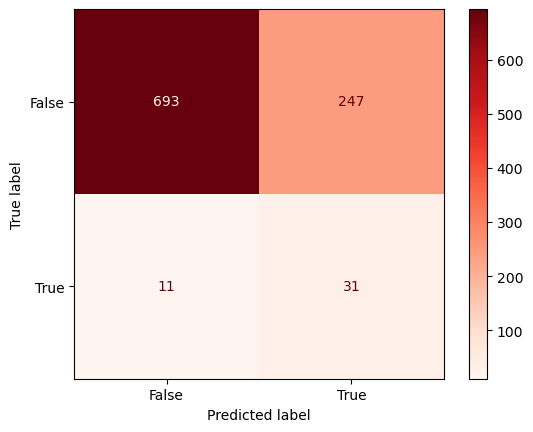

In [21]:
confusion_matrix = metrics.confusion_matrix(test_label, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot(cmap=plt.cm.Reds)
plt.show()

## MLP with Undersampling

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.neural_network import MLPClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
from imblearn.under_sampling import RandomUnderSampler

X = data.drop('stroke', axis=1)
y = data['stroke']

undersampler = RandomUnderSampler(random_state=42)

train_feature, test_feature, train_label, test_label = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

train_feature_dummy = pd.get_dummies(train_feature, drop_first=True)
test_feature_dummy = pd.get_dummies(test_feature, drop_first=True)

train_feature_dummy, train_label = undersampler.fit_resample(train_feature_dummy, train_label)

sss = StratifiedShuffleSplit(n_splits=4, test_size=0.20,random_state=0) 
sss.get_n_splits(train_feature_dummy, train_label)
print("##### TRAIN PHASE ####################################")
for i, (train_index, valid_index) in enumerate(sss.split(train_feature_dummy, train_label)):
    print("i :", "Train: ", train_index.shape, "--- Valid: ", valid_index.shape)
    X_train, X_valid = train_feature_dummy.iloc[train_index], train_feature_dummy.iloc[valid_index]
    y_train, y_valid = train_label.iloc[train_index], train_label.iloc[valid_index]
    model = MLPClassifier(hidden_layer_sizes=(15, 5), max_iter=5000)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_valid)
    accuracy = model.score(X_valid, y_valid)
    print('Accuracy:', accuracy)
    data_percentage = 1 - (data.stroke.sum()/len(data.stroke))
    print('Naive Model Accuracy:', data_percentage,)

    f1_score = metrics.f1_score(y_pred, y_valid)
    print("F1-score: ", f1_score)

    recall = metrics.recall_score(y_true=y_valid, y_pred=y_pred)
    print("recall: ", recall)

    print("---------------------------------------------")
print("##### TEST PHASE ####################################")
y_pred = model.predict(test_feature_dummy)
accuracy = model.score(test_feature_dummy, test_label)
print('Accuracy:', accuracy)
data_percentage = 1 - (data.stroke.sum()/len(data.stroke))
print('Naive Model Accuracy:', data_percentage,)

f1_score = metrics.f1_score(y_pred, test_label)
print("F1-score: ", f1_score)

recall = metrics.recall_score(y_true=test_label, y_pred=y_pred)
print("recall: ", recall)

##### TRAIN PHASE ####################################
i : Train:  (267,) --- Valid:  (67,)
Accuracy: 0.7014925373134329
Naive Model Accuracy: 0.9574164629176855
F1-score:  0.6875
recall:  0.6666666666666666
---------------------------------------------
i : Train:  (267,) --- Valid:  (67,)
Accuracy: 0.7611940298507462
Naive Model Accuracy: 0.9574164629176855
F1-score:  0.7647058823529412
recall:  0.7878787878787878
---------------------------------------------
i : Train:  (267,) --- Valid:  (67,)
Accuracy: 0.7014925373134329
Naive Model Accuracy: 0.9574164629176855
F1-score:  0.7297297297297296
recall:  0.7941176470588235
---------------------------------------------
i : Train:  (267,) --- Valid:  (67,)
Accuracy: 0.6716417910447762
Naive Model Accuracy: 0.9574164629176855
F1-score:  0.676470588235294
recall:  0.696969696969697
---------------------------------------------
##### TEST PHASE ####################################
Accuracy: 0.7118126272912424
Naive Model Accuracy: 0.95741646

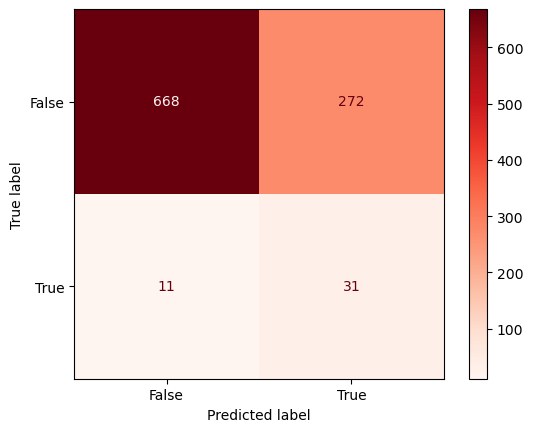

In [23]:
confusion_matrix = metrics.confusion_matrix(test_label, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot(cmap=plt.cm.Reds)
plt.show()